In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import json
from bs4 import BeautifulSoup
import wbgapi as wb

In [2]:
#Create a dictionary of countries
url= 'https://www.mipex.eu/sites/default/files/downloads/pdf/Policy%20Indicators%20Scores%20(2007-2019)%20%E2%80%93%20core%20set%20of%20indicators.xlsx'
acronyms = ['BE', 'BG', 'CZ', 'DK', 'DE', 'EE', 'IE', 'GR', 'ES', 'FR', 'HR', 'IT', 'CY', 'LV','LT','LU', 'HU',  'MT', 'NL', 'AT', 'PL', 'PT', 'RO', 'SI', 'SK', 'FI', 'SE', 'UK']
dict = pd.read_excel (url, sheet_name = acronyms)
dict['BE'].iloc[:20]

,Overall Scores,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50
0,Year,Overall Score (with health),Overall Score (with/out health),Overall Score (with/out health and education),NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2007,NaN,NaN,73.981481,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2008,NaN,NaN,73.981481,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2009,NaN,73.963719,73.981481,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2010,NaN,74.225624,74.287037,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2011,NaN,71.57483,71.194444,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2012,NaN,71.57483,71.194444,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2013,NaN,69.630385,68.925926,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2014,68.744296,69.630385,68.925926,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2015,NaN,69.630385,68.925926,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#Creating a merged dataframe with full country names
dict = pd.read_excel (url, sheet_name = acronyms, header = 1, nrows = 14, usecols = [0,1,2,3])
MIPEX = pd.concat (dict, join = 'outer').reset_index()
MIPEX= MIPEX.rename(columns = {'level_0': 'Country_Acronym'})
del MIPEX ['level_1']
Countries =  {'UK':'United Kingdom','BE':'Belgium', 'BG':'Bulgaria', 'CZ':'Czechia', 'DK':'Denmark', 'DE':'Germany', 'EE':'Estonia', 'IE':'Ireland', 'GR':'Greece', 'ES':'Spain', 'FR':'France', 'HR':'Croatia', 'IT':'Italy', 'CY':'Cyprus', 'LV':'Latvia', 'LT':'Lithuania', 'LU':'Luxembourg', 'HU':'Hungary', 'MT':'Malta', 'NL':'Netherlands', 'AT':'Austria', 'PL':'Poland', 'PT':'Portugal', 'RO':'Romania', 'SI':'Slovenia', 'SK':'Slovak Republic', 'FI':'Finland', 'SE':'Sweden'}
MIPEX['Country'] = MIPEX.Country_Acronym.map(Countries)
MIPEX.head()

,Country_Acronym,Year,Overall Score (with health),Overall Score (with/out health),Overall Score (with/out health and education),Country
0,BE,2007.0,NaN,NaN,73.981481,Belgium
1,BE,2008.0,NaN,NaN,73.981481,Belgium
2,BE,2009.0,NaN,73.963719,73.981481,Belgium
3,BE,2010.0,NaN,74.225624,74.287037,Belgium
4,BE,2011.0,NaN,71.574830,71.194444,Belgium


In [4]:
#Confirm how many missing values there are in each score
MIPEX.isnull().sum()

Country_Acronym                                    0
Year                                              28
Overall Score (with health)                      336
Overall Score (with/out health)                  111
Overall Score (with/out health and education)     34
Country                                            0
dtype: int64

In [5]:
#Use groupby to get an overview of the Overall score w/out health 
yearly_score_sans_health = MIPEX.groupby ('Year')['Overall Score (with/out health)']
yearly_score_sans_health.describe()

,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
2007.0,1.0,87.040816,NaN,87.040816,87.040816,87.040816,87.040816,87.040816
2008.0,1.0,87.040816,NaN,87.040816,87.040816,87.040816,87.040816,87.040816
2009.0,2.0,80.502268,9.246904,73.963719,77.232993,80.502268,83.771542,87.040816
2010.0,27.0,51.743344,14.887800,34.565760,39.606718,48.341270,55.765023,85.985261
2011.0,27.0,51.788664,14.686730,34.565760,39.915249,48.341270,56.336735,85.985261
2012.0,27.0,51.815886,14.243799,34.565760,41.355584,48.341270,56.176446,85.985261
2013.0,28.0,51.176567,13.996585,34.565760,40.904974,48.180556,55.559240,87.352608
2014.0,28.0,51.639466,13.985624,34.565760,41.169714,48.489796,55.559240,87.352608
2015.0,28.0,51.832847,14.155104,35.359410,41.169714,47.943736,55.746173,87.352608


In [6]:
#Refine Dataset for analysis and recheck null values
MIPEX = MIPEX[MIPEX['Year'] >= 2010][['Country','Country_Acronym', 'Year', 'Overall Score (with/out health)']]
MIPEX.isnull().sum()

Country                            0
Country_Acronym                    0
Year                               0
Overall Score (with/out health)    3
dtype: int64

In [7]:
#check influence of missing values
missing_score = MIPEX['Overall Score (with/out health)'].isnull().sum()
total_rows = MIPEX.shape[0]
(missing_score / total_rows) * 100

1.0714285714285714

In [8]:
MIPEX= MIPEX.dropna()
MIPEX.shape

(277, 4)

In [9]:
MIPEX.drop_duplicates().shape

(277, 4)

In [10]:
MIPEX.describe()

,Year,Overall Score (with/out health)
count,277.000000,277.000000
mean,2014.537906,52.139754
std,2.868401,14.019000
min,2010.000000,34.565760
25%,2012.000000,41.231293
50%,2015.000000,48.479308
75%,2017.000000,55.994331
max,2019.000000,87.352608


In [11]:
#Next I want to bring in WBG statistics for refugees population by country

In [12]:
Refugees= wb.data.DataFrame(['SM.POP.REFG'], time=range(2010, 2020), labels = True, columns = 'series').reset_index()
eu28_countries = ['Belgium', 'Bulgaria', 'Czechia', 'Denmark', 'Germany', 'Estonia', 'Ireland', 'Greece', 'Spain', 'France', 'Croatia', 'Italy', 'Cyprus', 'Latvia', 'Lithuania', 'Luxembourg', 'Hungary', 'Malta', 'Netherlands', 'Austria', 'Poland', 'Portugal', 'Romania', 'Slovenia', 'Slovak Republic', 'Finland', 'Sweden', 'United Kingdom']
Refugees = Refugees.set_index ('Country').loc[eu28_countries, :]
Refugees.head()

,economy,time,Time,SM.POP.REFG
Country,,,,
Belgium,BEL,YR2019,2019,61662.0
Belgium,BEL,YR2018,2018,42158.0
Belgium,BEL,YR2017,2017,42158.0
Belgium,BEL,YR2016,2016,42158.0
Belgium,BEL,YR2015,2015,35302.0


In [13]:
#Here I rename colums to make them compatible with the MIPEX dataframe
Refugees = Refugees.rename(columns = {'Time': 'Year', 'SM.POP.REFG': 'Refugees', 'economy': 'ISO'})
Refugees = Refugees.astype({'Year':'float'})
merge = MIPEX.merge (Refugees, on =['Country', 'Year'])
merge.head()

,Country,Country_Acronym,Year,Overall Score (with/out health),ISO,time,Refugees
0,Belgium,BE,2010.0,74.225624,BEL,YR2010,17891.0
1,Belgium,BE,2011.0,71.574830,BEL,YR2011,22396.0
2,Belgium,BE,2012.0,71.574830,BEL,YR2012,22023.0
3,Belgium,BE,2013.0,69.630385,BEL,YR2013,25617.0
4,Belgium,BE,2014.0,69.630385,BEL,YR2014,29170.0


In [14]:
#creating a clean dataset
dataset = merge[['Country','Year', 'Overall Score (with/out health)', 'Refugees']]
dataset.drop_duplicates().shape

(277, 4)

In [15]:
dataset.isnull().sum()

Country                            0
Year                               0
Overall Score (with/out health)    0
Refugees                           0
dtype: int64

In [16]:
#Next I define a function for adding a list of z scores for columns

def z_score (numbers_to_z_score):
    z_scored_numbers = []
    for x in numbers_to_z_score:
         z_scored_numbers.append((x - np.array(numbers_to_z_score).mean())/np.std(numbers_to_z_score))
    return z_scored_numbers

dataset['Overall_Score_Z_Scores'] = z_score(dataset['Overall Score (with/out health)'])
dataset['Refugees_Z_Scores'] = z_score(dataset['Refugees'])
dataset.head()

C:\Users\higgi\AppData\Local\Temp\ipykernel_8784\522131029.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Overall_Score_Z_Scores'] = z_score(dataset['Overall Score (with/out health)'])
C:\Users\higgi\AppData\Local\Temp\ipykernel_8784\522131029.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Refugees_Z_Scores'] = z_score(dataset['Refugees'])


,Country,Year,Overall Score (with/out health),Refugees,Overall_Score_Z_Scores,Refugees_Z_Scores
0,Belgium,2010.0,74.225624,17891.0,1.578275,-0.298313
1,Belgium,2011.0,71.574830,22396.0,1.388847,-0.267087
2,Belgium,2012.0,71.574830,22023.0,1.388847,-0.269672
3,Belgium,2013.0,69.630385,25617.0,1.249896,-0.244760
4,Belgium,2014.0,69.630385,29170.0,1.249896,-0.220133


In [17]:
#bring in country regions
url = 'https://en.wikipedia.org/wiki/List_of_countries_by_United_Nations_geoscheme'
#get data from url
data = requests.get(url).text
#parse with beautiful soup
soup = BeautifulSoup (data, 'html.parser')
#find table
table = soup.find ('table')
#extract rows and headers
table_rows = table.find_all('tr')
#list headers using .stri to remove any leading or trailing spaces and .text to get the text 
table_headers = [header.text.strip() for header in table.find_all('th')]
# Iterate from the 'tables' to search for table rows ('tr') and table elements ('td') and arrange them into columns according to the order.
# Lastly, append the located rows and elements to the created output table 'table_data'
table_data = pd.DataFrame(columns = table_headers)
for row in table_rows:
    col = row.find_all('td')
#where col are not equal to a null set take data and append to table_data headers
    if (col != []):
        country = col[0].text.strip()
        int_region = col[1].text.strip()
        sub_region = col[2].text.strip()
        region = col[3].text.strip()
        code = col [4].text.strip()
        table_data = table_data.append({'Country or Area':country, 
                                        'Intermediate Region':int_region, 
                                        'Sub-region':sub_region, 
                                        'Region':region,
                                        'UNSD M49 Codes':code}, ignore_index = True)
#clean data and select eu countries
table_data = table_data.rename (columns = {'Country or Area': 'Country'})
table_data= table_data.set_index ('Country')
table_data = table_data.rename (index = {'Czechia [Czech Republic]': 'Czechia', 
                                          'France [French Republic]':'France',
                                          'Slovakia': 'Slovak Republic',
                                         'United Kingdom of Great Britain and Northern Ireland': 'United Kingdom'})
eu_table_data= table_data.loc[eu28_countries]
eu_table_data.head()

C:\Users\higgi\AppData\Local\Temp\ipykernel_8784\1343905440.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table_data = table_data.append({'Country or Area':country,
C:\Users\higgi\AppData\Local\Temp\ipykernel_8784\1343905440.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table_data = table_data.append({'Country or Area':country,
C:\Users\higgi\AppData\Local\Temp\ipykernel_8784\1343905440.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table_data = table_data.append({'Country or Area':country,
C:\Users\higgi\AppData\Local\Temp\ipykernel_8784\1343905440.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table_data = ta

,Intermediate Region,Sub-region,Region,UNSD M49 Codes
Country,,,,
Belgium,,Western Europe,Europe,056 < 155 < 150 < 001
Bulgaria,,Eastern Europe,Europe,100 < 151 < 150 < 001
Czechia,,Eastern Europe,Europe,203 < 151 < 150 < 001
Denmark,,Northern Europe,Europe,208 < 154 < 150 < 001
Germany,,Western Europe,Europe,276 < 155 < 150 < 001


In [27]:
#Merge sub-region data with dataset
eu_table_data = eu_table_data.reset_index()[['Country','Sub-region']]
dataset = dataset.merge(eu_table_data, on ='Country')


,Country,Year,Overall Score (with/out health),Refugees,Overall_Score_Z_Scores,Refugees_Z_Scores,Sub-region_x,Refugees_log,Sub-region_y,Sub-region,MIPEX_log
0,Belgium,2010.0,74.225624,17891.0,1.578275,-0.298313,Western Europe,9.792053,Western Europe,Western Europe,4.307109
1,Belgium,2011.0,71.574830,22396.0,1.388847,-0.267087,Western Europe,10.016638,Western Europe,Western Europe,4.270743
2,Belgium,2012.0,71.574830,22023.0,1.388847,-0.269672,Western Europe,9.999843,Western Europe,Western Europe,4.270743
3,Belgium,2013.0,69.630385,25617.0,1.249896,-0.244760,Western Europe,10.151011,Western Europe,Western Europe,4.243201
4,Belgium,2014.0,69.630385,29170.0,1.249896,-0.220133,Western Europe,10.280896,Western Europe,Western Europe,4.243201


In [ ]:
#add log variables
dataset ['Refugees_log'] = np.log(dataset ['Refugees'])
dataset ['MIPEX_log'] = np.log (dataset ['Overall Score (with/out health)'])
dataset.head()

In [21]:
dataset.describe()

,Year,Overall Score (with/out health),Refugees,Overall_Score_Z_Scores,Refugees_Z_Scores,Refugees_log
count,277.000000,277.000000,2.770000e+02,2.770000e+02,2.770000e+02,277.000000
mean,2014.537906,52.139754,6.092832e+04,3.056119e-17,7.014044e-17,9.013115
std,2.868401,14.019000,1.445300e+05,1.001810e+00,1.001810e+00,2.267397
min,2010.000000,34.565760,3.100000e+01,-1.255853e+00,-4.221098e-01,3.433987
25%,2012.000000,41.231293,1.577000e+03,-7.795281e-01,-4.113937e-01,7.363280
50%,2015.000000,48.479308,7.795000e+03,-2.615786e-01,-3.682936e-01,8.961238
75%,2017.000000,55.994331,5.640200e+04,2.754515e-01,-3.137417e-02,10.940260
max,2019.000000,87.352608,1.146682e+06,2.516341e+00,7.525902e+00,13.952383


In [53]:
dataset.to_csv(r'C:\Users\higgi\OneDrive\Documents\ZIP UCDPA project.zip')

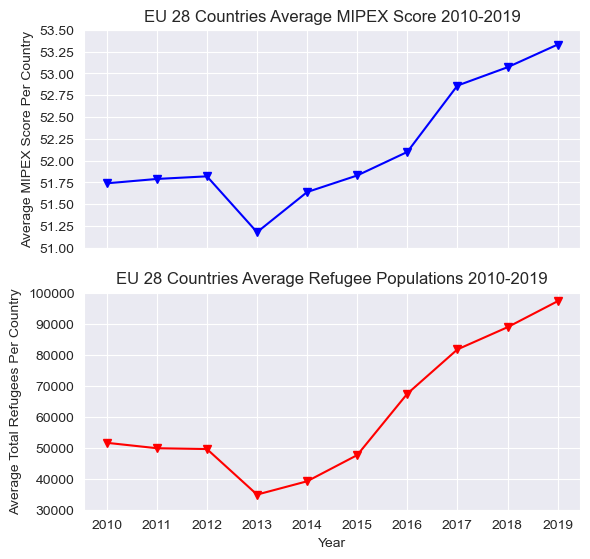

In [22]:
sns.set_style("darkgrid")
fig, ax = plt.subplots (2,1, sharey = False, sharex = True)

ax[0].plot(dataset.groupby('Year')['Overall Score (with/out health)'].agg(['mean']).round(2),
           marker = 'v',
           color='b')
ax[0].set_ylabel ('Average MIPEX Score Per Country(out of 100)')
ax[0]. set_title ('EU 28 Countries Average MIPEX Score 2010-2019')
ax [0].set_yticks([ 51,51.25, 51.5, 51.75, 52, 52.25, 52.5, 52.75, 53, 53.25, 53.5])
ax[1].plot(dataset.groupby('Year')['Refugees'].agg(['mean']).round(2), 
           marker= 'v', 
           color='r')
ax[1].set_xlabel ('Year')
ax[1].set_ylabel ('Average Total Refugees Per Country')
ax[1]. set_title ('EU 28 Countries Average Refugee Populations 2010-2019')
ax [1].set_xticks([2010,2011,2012,2013,2014,2015,2016,2017,2018,2019])
ax [1].set_yticks([30000,40000,50000,60000,70000,80000,90000,100000])
plt.subplots_adjust(top=2,
                    bottom=1)

plt.show()

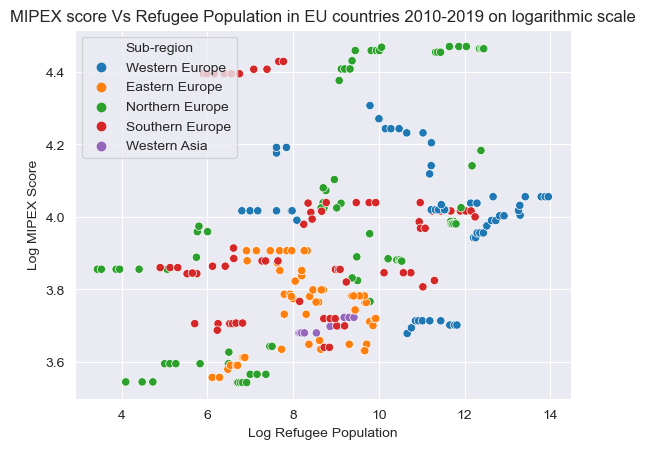

In [29]:
ax = sns.scatterplot(y = 'MIPEX_log', 
                x = 'Refugees_log', 
                hue = 'Sub-region', 
                data = dataset)
ax.set( xlabel= 'Log Refugee Population',
       ylabel= 'Log MIPEX Score',
       title = 'MIPEX score Vs Refugee Population in EU countries 2010-2019 on logarithmic scale')
plt.show()

In [49]:

Country_data = dataset.pivot_table(values = ['Refugees','Refugees_Z_Scores','Overall Score (with/out health)','Overall_Score_Z_Scores'], index = ['Country','Sub-region'] )
Country_data = Country_data.sort_values (['Overall_Score_Z_Scores'], ascending = False)
Country_data

,,Overall Score (with/out health),Overall_Score_Z_Scores,Refugees,Refugees_Z_Scores
Country,Sub-region,,,,
Sweden,Northern Europe,86.729705,2.471828,166108.6,0.729057
Finland,Northern Europe,84.260091,2.295347,14845.8,-0.319421
Portugal,Southern Europe,81.792517,2.119012,1070.4,-0.414905
Belgium,Western Europe,70.161338,1.287838,34053.5,-0.186283
Luxembourg,Western Europe,58.458078,0.451513,2092.5,-0.407820
Netherlands,Western Europe,58.184410,0.431956,86894.0,0.179981
Ireland,Northern Europe,57.242744,0.364664,6749.4,-0.375541
Germany,Western Europe,56.876701,0.338506,632659.8,3.962957
United Kingdom,Northern Europe,55.990079,0.275148,144831.5,0.581575


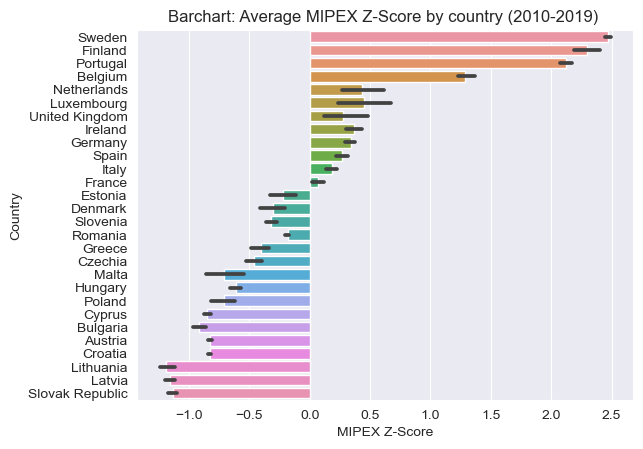

In [47]:
dataset = dataset.sort_values (['Overall_Score_Z_Scores'], ascending = False)
ax = sns.barplot(x=dataset['Overall_Score_Z_Scores'], y = dataset['Country'])
ax.set( xlabel= 'MIPEX Z-Score',
       ylabel= 'Country',
       title = 'Barchart: Average MIPEX Z-Score by country (2010-2019) ')
plt.show()

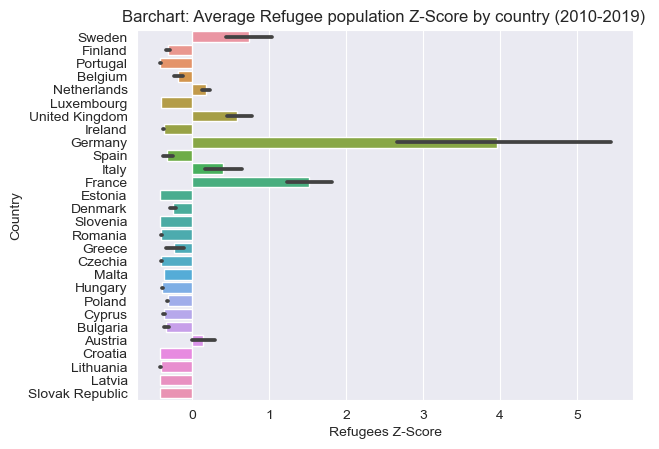

In [48]:
ax = sns.barplot(x=dataset['Refugees_Z_Scores'], y = dataset['Country'])
ax.set( xlabel= 'Refugees Z-Score',
       ylabel= 'Country',
       title = 'Barchart: Average Refugee population Z-Score by country (2010-2019) ')
plt.show()